# 🤖 Supervised and Unsupervised Learning in Machine Learning

Machine Learning is the science of making computers learn and act like humans by feeding data and information without being explicitly programmed.

Machine learning algorithms are trained with training data. When new data comes in, they can make predictions and decisions accurately based on past data. 

For example, whenever you ask Siri to do something, a powerful speech recognition converts the audio into its corresponding textual form. This is sent to the Apple servers for further processing where language processing algorithms are run to understand the user's intent. Then finally, Siri tells you the answer. 

There are **two types** of machine learning:

1. Supervised Learning
2. Unsupervised Learning

In [1]:
from IPython.display import Image

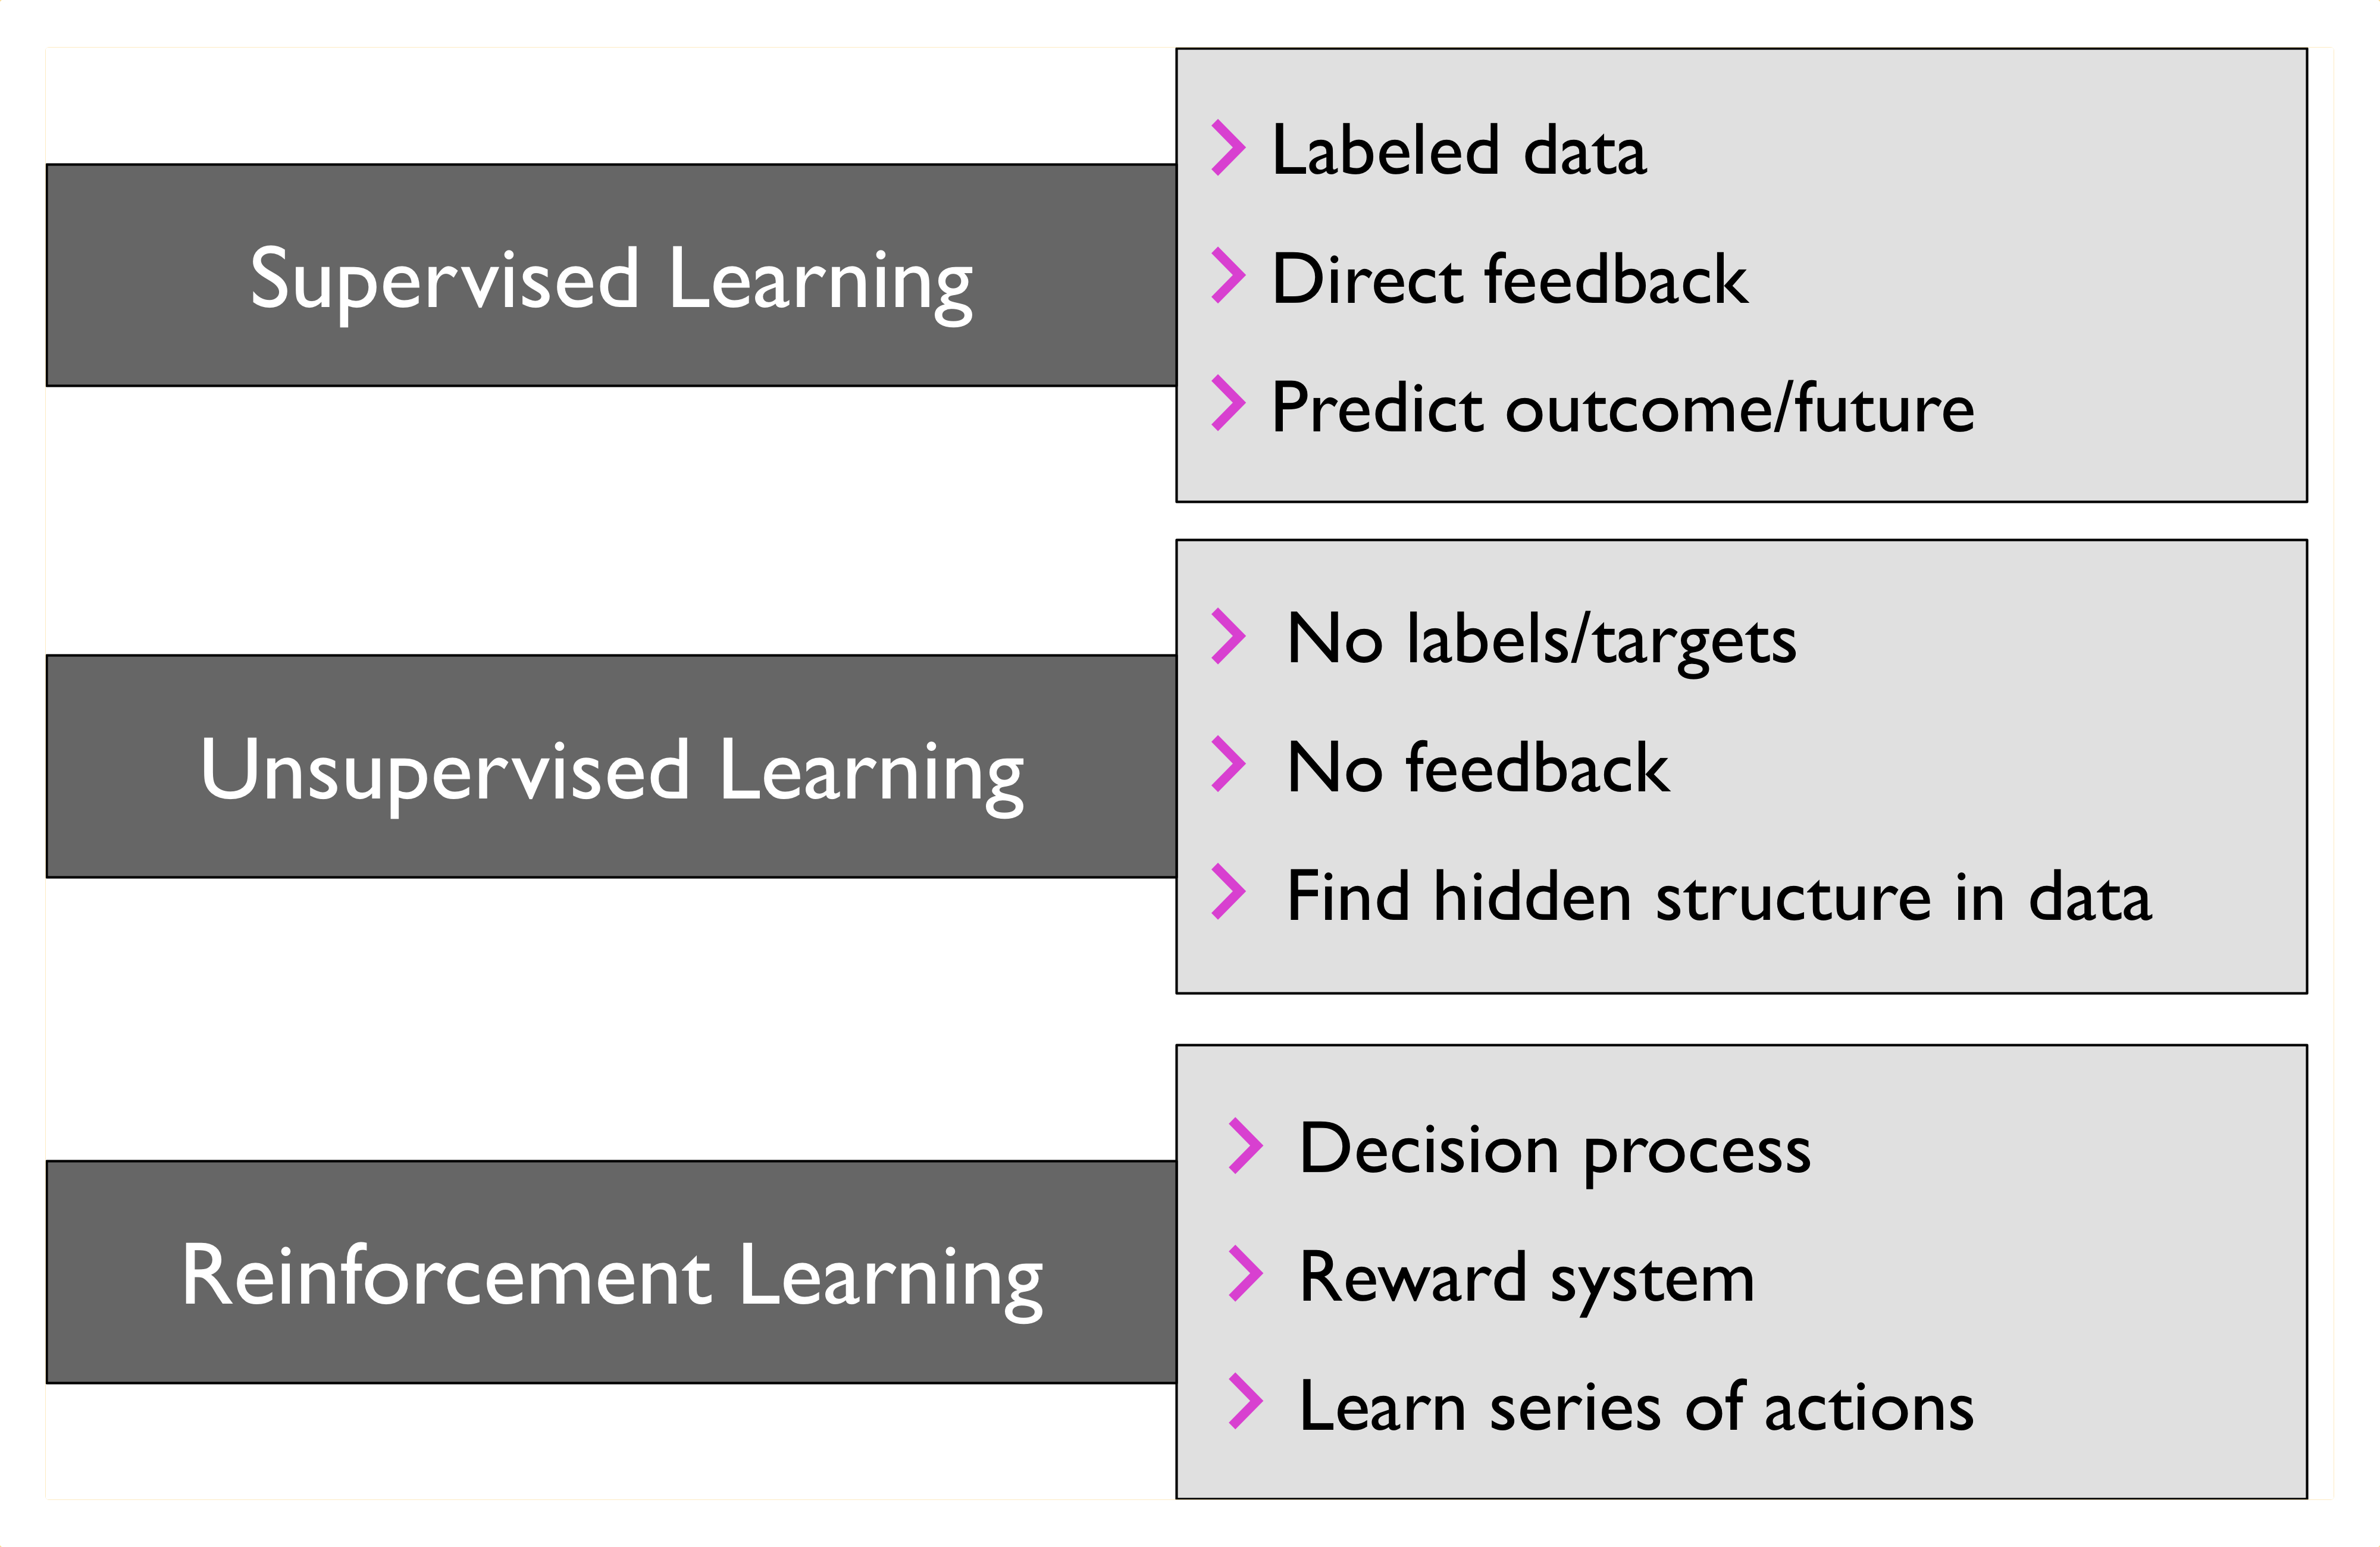

In [2]:
Image(filename="images/01_01.png",width=500)

## What is Supervised Learning?

In Supervised Learning, the machine learns under supervision. It contains a model that is able to predict with the help of a labeled dataset. A labeled dataset is one where you already know the target answer. 

<img src="https://www.simplilearn.com/ice9/free_resources_article_thumb/supervised-learning.png">

In this case, we have images that are labeled a spoon or a knife. This known data is fed to the machine, which analyzes and learns the association of these images based on its features such as shape, size, sharpness, etc. Now when a new image is fed to the machine without any label, the machine is able to predict accurately that it is a spoon with the help of the past data.

Supervised learning can be further divided into two types:

1. Classification
2. Regression

## What is Unsupervised Learning?
In Unsupervised Learning, the machine uses unlabeled data and learns on itself without any supervision. The machine tries to find a pattern in the unlabeled data and gives a response.

<img src="https://www.simplilearn.com/ice9/free_resources_article_thumb/unsupervised-machine-learning.png">

Unsupervised learning can be further grouped into types:

1. Clustering
2. Association

## Difference Between Supervised and Unsupervised Learning

<table><tbody>
<tr>
<td>
<p><strong>Supervised Learning</strong></p>
</td>
<td>
<p><strong>Unsupervised Learning</strong></p>
</td>
</tr>
<tr>
<td>
<p>It uses known and labeled data as input</p>
</td>
<td>
<p>It uses unlabeled data as input</p>
</td>
</tr>
<tr>
<td>
<p>It has a feedback mechanism&nbsp;</p>
</td>
<td>
<p>It has no feedback mechanism</p>
</td>
</tr>
<tr>
<td>
<p>The most commonly used supervised learning algorithms are:</p>
<ul>
<li>Decision tree</li>
<li>Logistic regression</li>
<li>Support vector machine</li>
</ul>
</td>
<td>
<p>The most commonly used unsupervised learning algorithms are:&nbsp;</p>
<ul>
<li>K-means clustering</li>
<li>Hierarchical clustering</li>
<li>Apriori algorithm</li>
</ul>
</td>
</tr>
</tbody></table>

## Choosing the right estimator

Often the hardest part of solving a machine learning problem can be finding the right estimator for the job.

Different estimators are better suited for different types of data and different problems.


<img src="https://scikit-learn.org/stable/_static/ml_map.png" width=1200>

In machine learning, Classification is used to split data into categories. But after cleaning and preprocessing the data and training our model, how do we know if our classification model performs well? That is where a confusion matrix comes into the picture. 

A confusion matrix is used to measure the performance of a classifier in depth. In this simple guide to Confusion Matrix, we will get to understand and learn confusion matrices better.

# ✍🏻 MNIST dataset and performance measures

In this notebook, we would like to go through some of the ML algorithms. Precisely, we would like to evaluate and compare the following performance metrics :
- Confusion matrix
- Recall
- Precision
- FP Rate
- Specificity
- ROC curve

The measures will be taken on classification tasks on handwritten data.

The metrics will be implemented from scratch and will be compared to the metrics offered by the standard librairies *(scikit-learn)*.

🛑 KNN will be coded from scratch ! 



## Importing librairies

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random

## Reading the data from the files


We're going to use a csv file that contain the data that we're going to read.

<h3> MNIST </h3>

These data are from the MNIST dataset.

The MNIST database is a large database of handwritten digits that is commonly used for training various image processing systems.

The MNIST *(Modified National Institute of Standards and Technology database)* database of **handwritten digits**, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.
It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting.

<center><img src="https://www.mdpi.com/applsci/applsci-09-03169/article_deploy/html/images/applsci-09-03169-g001.png" width=800></center>


MNIST is a simple computer vision dataset. It consists of 28x28 pixel images of handwritten digits, such as:

<center><img src="images/mnist1.png"></center>




## 📊📂The training set (data & labels)

### 📜 Data

In [4]:
# data
X = np.genfromtxt('data.csv', delimiter=',', dtype=int)
X.shape

(5000, 400)

In our case, we have 5000 samples for training.

Each of the sample has **400 features**; in reality, this is a **20*20 pixels image** that we can reshape to vizualise.

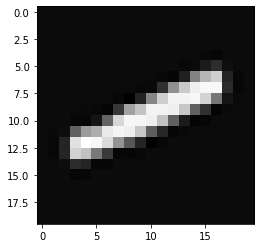

In [5]:
# X[600;:] means the 600th sample with all its features

digit = X[600,:].reshape((20, 20))
plt.imshow(digit,cmap='gray')

As we can see, this looks like a *1*, but it's inverted...
Let's flip the image (transpose the matrix)  to get what we want!

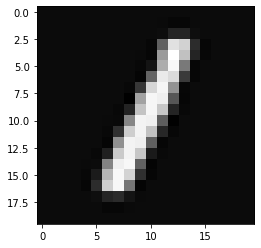

In [6]:
plt.imshow(digit.transpose(),cmap='gray')

Here, we can see a beautiful handwritten 1️⃣ !

### 🔖 Labels

In machine learning, data labeling is the process of identifying raw data (images, text files, videos, etc.) and adding one or more meaningful and informative labels to provide context so that a machine learning model can learn from it.

In our case, we have a csv file comprising of labels (from 1 to 10).

<center><img src="https://learningactors.com/wp-content/uploads/2017/08/10.png" ></center>

Let's dive into our ``labels.csv`` file and see how our labels look like :

In [7]:
y = np.genfromtxt('labels.csv', delimiter=',', dtype=int)
y.shape

(5000,)

These **5000 rows** correspond to each of the 5000 rows of the training set we saw earlier.

Let's, for the sake of this homework, do a statistical distribution of our data

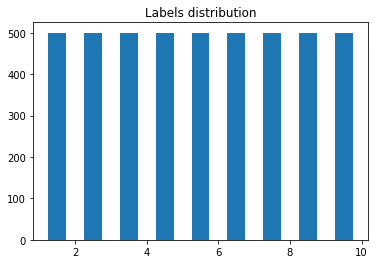

In [8]:
plt.hist(y, bins = np.arange(1,11),histtype='barstacked',align='mid',rwidth=0.5) 
plt.title("Labels distribution") 
plt.show()

We notice that we have a **lot of handwritten zeros**.

Let's plot some random data of our dataset 

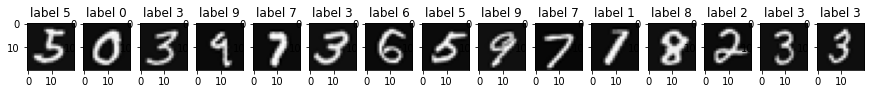

In [9]:
plt.figure(figsize=(15,8))

# This number represent the number of rows from data.csv we want to display (randomly)
nbr_queries = 15

for i in range(nbr_queries): 
    #The row we're fetching is never gonna be greater than X.shape[0] = 5000
    row = random.randint(X.shape[0])
    digit_image = X[row,:].reshape((20, 20)).transpose()
    plt.subplot(1,nbr_queries,i+1)
    plt.title('label '+ str(y[row]))
    plt.imshow(digit_image,cmap='gray')

By convention, **label 10** corresponds to **0**. This is used in order to facilitate heavy computations if we using matlab (the dataset was used there).

In order to fix this, let's go ahead and change the label 10 and turn it to 0.

In [10]:
import pandas as pd
serie = pd.read_csv('labels.csv')

# 📉 Performance measures

In this part, we're going to define the general performance measures all along with **their implementation from scratch**.

<h3> What Are Confusion Matrices, and Why Do We Need Them? </h3>


Classification Models have multiple categorical outputs. Most error measures will calculate the total error in our model, but we cannot find individual instances of errors in our model. The model might misclassify some categories more than others, but we cannot see this using a standard accuracy measure.

Furthermore, suppose there is a significant class imbalance in the given data. In that case, i.e., a class has more instances of data than the other classes, a model might predict the majority class for all cases and have a high accuracy score; when it is not predicting the minority classes. This is where confusion matrices are useful.

A confusion matrix presents a table layout of the different outcomes of the prediction and results of a classification problem and helps visualize its outcomes.

It plots a table of all the predicted and actual values of a classifier.

<center><img src="https://www.nbshare.io/static/snapshots/cm_colored_1-min.png" width=800></center>

<h4>False Positives (FP-Type 1 error) vs False Negatives (FN-Type 2 error)</h4>

<center><img src="https://www.nbshare.io/static/snapshots/Precisionrecall_2-min.png" width=400></center>

**a Type 1 error** is the rejection of the null hypothesis when it is actually true

**a Type 2 error** is the acceptance of the null hypothesis when it is actually false.  (Some statisticians prefer to say “failure to reject” rather than “accept” the null hypothesis for Type 2 errors.)


**A Type 1 error** is also known as a false positive, and **a Type 2 error** is also known as a false negative.  This nomenclature comes from the conventional connotation of

the null hypothesis as the “negative” or the “boring” result
the alternative hypothesis as the “positive” or “exciting” result.

### ⚫ Confusion Matrix

 In our case, we have 10 classes, so the matrix is 10*10.

 The matrix will look like this one :
 
<center><img src="https://www.researchgate.net/profile/Alejandro-Baldominos/publication/328816477/figure/fig3/AS:703352962809858@1544703822325/Confusion-matrix-for-the-MNIST-dataset-with-the-best-ensemble.png"></center>

In [11]:
def confusion_matrix(actual_values, predicted_values):
   """
   Compute confusion matrix to evaluate the accuracy of a classification.
   
   Parameters:
   actual_values : array-like of shape (n_samples,)
   Ground truth (correct) target values.

   predicted_values :array-like of shape (n_samples,)
   Estimated targets as returned by a classifier.
   
   Returns:
   
   C: ndarray of shape (n_classes, n_classes)
   Confusion matrix whose i-th row and j-th column entry indicates the number of samples with true label being i-th class and predicted label 
   being j-th class.
   """
   cm = np.zeros((10,10))
   for i in range(len(actual_values)):
      cm[actual_values[i]-1][predicted_values[i]-1] += 1
      
   return cm.astype(np.int64)

Now, we got our confusion matrix.

In order to compute the main performance measure, we need to extract from that matrix the FP,FN, TP and TN.

<center><img src="https://i.stack.imgur.com/AuTKP.png"></center>


In [12]:
def get_parameters(confusion_matrix,n_class): 
  """
  Returns a (n_class,TP,FP,FN,TN) tuple for each class given.
  """
  TP = confusion_matrix[n_class-1][n_class-1]
  FP = confusion_matrix[:,n_class-1].sum() - TP
  FN = confusion_matrix[n_class-1,:].sum() - TP
  TN = np.sum(confusion_matrix) - (FP + FN + TP)
  return ('Class {}'.format(n_class),TP,FP,FN,TN)

In [13]:
conf_mat = confusion_matrix([1,2,3,8,8,4],[1,2,8,8,8,6])
conf_mat 

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 2, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

In [14]:
get_parameters(conf_mat,7)

('Class 7', 0, 0, 0, 6)

### ⚫ Accuracy

How many values did we predict correctly? How many true predictions out of all samples there are?

<center><img src="https://www.nbshare.io/static/snapshots/Accuracy_3-min.png"></center>

In [15]:
# To-Do : compute the accuracy
def accuracy(confusion_matrix,n_class):
  TP,FP,FN,TN = get_parameters(confusion_matrix,n_class)
  return TP+TN/np.sum(conf_mat)

### ⚫ Precision

**Precision is used to calculate the model's ability to classify positive values correctly. It is the true positives divided by the total number of predicted positive values.** Example - If you predicted that 100 patients would catch Covid-19, but only 90 of patients actually got covid, then your precision is 90%. So out of all predicted positives (true positive and false positive) how many are actually true positive(tp)?

<center><img src="https://www.nbshare.io/static/snapshots/precision_5-min.png"></center>

In [16]:

def precision(confusion_matrix,n_class):
  TP,FP,FN,TN = get_parameters(confusion_matrix,n_class)
  return TP/(TP+FP)
  

### ⚫ Recall (Sensitivity or True Positive Rate)

**It is used to calculate the model's ability to predict positive values. "How often does the model predict the correct positive values?"**

<center><img src="https://miro.medium.com/max/472/1*Jr5SEZgQ37gr6JKBDT8V1g.png"></center>

In [17]:
#To-Do
def recall(confusion_matrix,n_class):
  TP,FP,FN,TN = get_parameters(confusion_matrix,n_class)
  return TP/(TP+FN)
  

### ⚫ False Positive Rate *(Fall out)*

**FPR (ranges from 0 to 1, lower is better) is the ratio between the number of negative events wrongly categorized as positive (false positives) and the total number of actual negative events.**


In [18]:
#To-Do
def fpr(confusion_matrix,n_class):
  TP,FP,FN,TN = get_parameters(confusion_matrix,n_class)
  return FP/(TP+FP)

### ⚫ Specificity  *(True Negative Rate)*

**Specificity is defined as the proportion of actual negatives, which got predicted as the negative (or true negative).** This implies that there will be another proportion of actual negative, which got predicted as positive and could be termed as false positives. This proportion could also be called a false positive rate.

<center><img src="https://editor.analyticsvidhya.com/uploads/61426Screenshot%202021-06-16%20075939.jpg" width=500></center>

In [19]:
#To-Do
def specifity(confusion_matrix,n_class):
  TP,FP,FN,TN = get_parameters(confusion_matrix,n_class)
  return 1 - fpr(TP,FP)

In [20]:
def ROC_Curve(proba,Xtt,Ytt,n_class):
  thresh = np.linspace(0,1,num=10)
  fprs = []
  tprs = []
  for v in thresh:
    pred = (proba[:,n_class-1] >= v).astype(bool)
    predd = pred.copy().astype(int)
    predd[pred] = n_class
    confm = confusion_matrix(Ytt,predd)
    FP,FN,TP,TN = get_parameters(confm,n_class)
    fprs = fprs + [precision(TP,FP)]
    tprs = tprs + [TP/(TP+FN)]
  print(fprs)
  print(tprs)
  fig,ax = plt.subplots()
  ax.plot(fprs,tprs,label=('Courbe ROC pour la classe',n_class))
  ax.set_xlabel('False Positive Rate')
  ax.set_ylabel('True Positive Rate')
  ax.legend()

### ⚫ ROC Curve



### 🧪 Building the confusion matrix class

In [21]:
class ConfusionMatrix():
  def __init__(self,actual_values, predicted_values):
    self.actual_values = actual_values
    self.predicted_values = predicted_values
    self.confusion_matrix = np.zeros((10,10))
    # The sum of the confusion matrix represents the size of the samples
    self.total_samples = 0
    self.conf_mat_parameters = None # TP,FP,FN,TN
    
  def confusion_matrix(self,actual_values, predicted_values):
      """
      Compute confusion matrix to evaluate the accuracy of a classification.

      Parameters:
      actual_values : array-like of shape (n_samples,)
      Ground truth (correct) target values.   
      predicted_values :array-like of shape (n_samples,)
      Estimated targets as returned by a classifier.

      Returns:

      C: ndarray of shape (n_classes, n_classes)
      Confusion matrix whose i-th row and j-th column entry indicates the number of samples with true label being i-th class and predicted label 
      being j-th class.
      """   
      for i in range(len(actual_values)):
         self.confusion_matrix[actual_values[i]-1][predicted_values[i]-1] += 1

      self.total_samples = np.sum(self.confusion_matrix)

      return confusion_matrix.astype(np.int64)
  
  def get_parameters(self,n_class): 
    """
    Returns the class_id and the corresponding TP,FP,FP and TN ratio.
    """
    TP = self.confusion_matrix[n_class-1][n_class-1]
    FP = self.confusion_matrix[:,n_class-1].sum() - TP
    FN = self.confusion_matrix.sum(axis=1) - TP
    TN = np.sum(self.confusion_matrix) - (FP + FN + TP)
    self.conf_mat_parameters = (TP,FP,FP,TN)
    return ('Class {}'.format(n_class),TP,FP,FP,TN)

  @property
  def accuracy(self):
    """
    Values predicted correctly. (TP and TN)
    """
    TP,TN = self.conf_mat_parameters[0],self.conf_mat_parameters[4]
    return (TP+TN)/self.total_samples
  
  @property
  def precision(self):
    """
    Calculation of percentage of how many times a prediction is correct out of total predictions.
    """
    TP,FP = self.conf_mat_parameters[0],self.conf_mat_parameters[1]
    return TP/(TP+FP)

  @property
  def recall(self):
    """
    Calculation of percentage of how many times a prediction is correct out of total predictions.
    """
    TP,FP = self.conf_mat_parameters[0],self.conf_mat_parameters[1]
    return TP/(TP+FP)

  @property
  def fpr(self):
    """
    Calculation of percentage of how many times a prediction is correct out of total predictions.
    """
    TP,FP = self.conf_mat_parameters[0],self.conf_mat_parameters[1]
    return TP/(TP+FP)

  @property
  def specifity(self):
    """
    Calculation of percentage of how many times a prediction is correct out of total predictions.
    """
    TP,FP = self.conf_mat_parameters[0],self.conf_mat_parameters[1]
    return TP/(TP+FP)
  

# 📒 Classification

In [22]:
%pip install -U scikit-learn

You should consider upgrading via the 'C:\Users\kawaremu\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [23]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier

Définir d'abord la base d'entrainement Xt, Yt et la base de test Xtt, Ytt

In [24]:
train_ratio = 2/3
test_ratio = 1/3

## K-Nearest Neighbors

In [25]:
import math

In [26]:
def KPP(x,X, Y):
    # Il faudra retourner l'etiquette de x, en le comparant à toutes les données de Xt, Yt
    pass

In [27]:
K = 5
def distance(a,b):
    return(math.sqrt(((a-b)**2).sum()))
def moinsProche(ppv,x):
    i = 0;j=1
    mini = distance(x,ppv[0])
    while(j<K):
        if(distance(x,ppv[j])>mini):
            mini = distance(x,ppv[j])
            i = j
        j=j+1
    return(mini,i)
def KPP(x, X, Y):
    K = min(K,X.shape[0])
    ppv = X[0:K]
    eppv= Y[0:K]
    disMP,MP = moinsProche(ppv,x)
    for t in range(K,X.shape[0]):
        if(distance(x,X[t])<disMP):
            ppv[MP]=X[t]
            eppv[MP]=Y[t]
            disMP,MP = moinsProche(ppv,x)
    nums = np.zeros(11)
    for t in eppv:
        nums[t]=nums[t]+1
    mx = max(nums)
    for t in range(0,11):
        if(nums[t]==mx):
            return(t)

## Méthode 1: MVS
Machine à Vecteurs de Support

In [28]:
#Créer le modèle
model = svm.SVC(kernel='linear') 
# entrainement 
model.fit(Xt, Yt)
# Prediction
y_pred = model.predict(Xtt)

NameError: name 'Xt' is not defined

In [ ]:
# tester une image
c= 3
y_pred[c]
a = Xtt[c,:].reshape((20, 20))
a=np.transpose(a)
plt.title('label '+ str(Ytt[c]))
plt.imshow(a,cmap='gray')

## Méthode 2: Arbres de décision


In [ ]:
# Créer le modèle
model = DecisionTreeClassifier()
# Entrainer le modèle
model = model.fit(Xt, Yt)
# Prediction
y_pred = model.predict(Xtt)

In [ ]:
# tester une image
c= 3
y_pred[c]
a = Xtt[c,:].reshape((20, 20))
a=np.transpose(a)
plt.title('label '+ str(Ytt[c]))
plt.imshow(a,cmap='gray')

## Méthode 3: RN 
Réseaux de neurones Perceptron

In [ ]:
model = MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(25),max_iter=100000)
Xt, Xtt, Yt, Ytt = train_test_split(X, Y, random_state=0, test_size=0.7)
model.fit(Xt, Yt)

In [ ]:
# Choisir un image de test 
c=0

In [ ]:
model.predict([Xtt[c,:]])

In [ ]:
# pour ROC, il faudra les probabilités:
model.predict_proba([Xtt[c,:]])

Afficher l'image testée

In [ ]:
a = Xtt[c,:].reshape((20, 20))
a=np.transpose(a)
plt.title('label '+ str(Ytt[c]))
plt.imshow(a,cmap='gray')

## Méthode 4: RNC
Réseaux de Neurones Convolutifs

In [ ]:
# Pour RNC
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD

In [ ]:
# reshape dataset to have a single channel
Xt, Xtt, Yt, Ytt = train_test_split(X, y, random_state=0, test_size=0.7)

Xt_rnc = Xt.reshape((Xt.shape[0], 20, 20, 1))
Xtt_rnc = Xtt.reshape((Xtt.shape[0], 20, 20, 1))

In [ ]:
# Recoder le valeurs
Yt_rnc = to_categorical(Yt)
Ytt_rnc = to_categorical(Ytt)

Xt_rncN = Xt_rnc.astype('float32')
Xtt_rncN = Xtt_rnc.astype('float32')

# normaliser
Xt_rncN = Xt_rncN / 255.0
Xtt_rncN = Xtt_rncN / 255.0

# definir le modèle RNC
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(20, 20, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))
# compiler le modèle
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# evaluaer le modèle
_, acc = model.evaluate(Xtt_rncN, Ytt_rnc, verbose=0)


# 📈 Regression problems

Linear Regression is a method used to define a relationship between a dependent variable (Y) and independent variable (X). Which is simply written as :

<center><img src="https://miro.medium.com/max/722/1*nejpuvlh1MbMGQtve_1ztQ.png"></center>

Where y is the dependent variable, m is the scale factor or coefficient, b being the **bias coefficient** and X being the independent variable. The bias coefficient gives an extra degree of freedom to this model. The goal is to draw the line of best fit between X and Y which estimates the relationship between X and Y.

But how do we find these coefficients, We can find these using different approaches. One is the Ordinary Least Mean Square Method approach and the Gradient Descent approach. We will be implementing the Ordinary Least Mean Square Method.

# References

https://machinelearningmastery.com/types-of-classification-in-machine-learning/#:~:text=In%20machine%20learning%2C%20classification%20refers,one%20of%20the%20known%20characters.

